## Proyecto 3. Entrega 1
### Analsisis Exploratorio Violencia Intrafamiliar 
Diego Duarte 22075 - José Marchena 22398 - Andrés Kou 22305 - Esteban Zambrano 22119

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import os

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Analisis de Variables

In [3]:
path = "./data/vif"
files = os.listdir(path)
print("Archivos en la carpeta:", files)

dfs = {file[:-4]: pd.read_csv(os.path.join(path, file)) for file in files if file.endswith(".csv")}

Archivos en la carpeta: ['VifAlfa.csv', 'VifAreaSexoEdad.csv', 'VifEscolaridad.csv', 'VifPuebloSexoRelacion.csv']


#### Función para clasificar tipo de variable

In [4]:
def describir_dataset(df, nombre):
    print(f"\nAnálisis del dataset: {nombre}")
    print(f"Dimensiones: {df.shape[0]} filas, {df.shape[1]} columnas\n")
    
    tipos = df.dtypes
    resumen = []
    
    for col in df.columns:
        tipo = tipos[col]
        unicos = df[col].nunique()
        if tipo in ['int64', 'float64']:
            if unicos <= 20:
                clasificacion = "Categórica (númerica)"
            else:
                clasificacion = "Cuantitativa"
        else:
            clasificacion = "Categórica"
        resumen.append((col, tipo, unicos, clasificacion))
    
    resumen_df = pd.DataFrame(resumen, columns=["Variable", "Tipo (dtype)", "Valores únicos", "Clasificación"])
    display(resumen_df)

for nombre, df in dfs.items():
    describir_dataset(df, nombre)



Análisis del dataset: VifAlfa
Dimensiones: 832 filas, 8 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Grupos de edad,object,35,Categórica
1,Total,object,580,Categórica
2,Alfabeta,object,555,Categórica
3,Analfabeta,object,337,Categórica
4,Ignorado,object,68,Categórica
5,Sexo,object,2,Categórica
6,Victima o Agresor,object,2,Categórica
7,Anio,int64,13,Categórica (númerica)



Análisis del dataset: VifAreaSexoEdad
Dimensiones: 452 filas, 15 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Grupos quinquenales de edad,object,24,Categórica
1,Total,int64,401,Cuantitativa
2,TotalH,object,358,Categórica
3,TotalM,int64,356,Cuantitativa
4,Urban,int64,381,Cuantitativa
5,UrbanH,int64,315,Cuantitativa
6,UrbanM,int64,329,Cuantitativa
7,Rural,object,372,Categórica
8,RuralH,object,294,Categórica
9,RuralM,object,307,Categórica



Análisis del dataset: VifEscolaridad
Dimensiones: 876 filas, 11 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Grupo de edades,object,33,Categórica
1,Total,object,574,Categórica
2,Ninguno,object,338,Categórica
3,Primaria,object,452,Categórica
4,Básico,object,297,Categórica
5,Diversificado,object,311,Categórica
6,Universitario,object,146,Categórica
7,Ignorado,object,161,Categórica
8,Sexo,object,2,Categórica
9,Victima o Agresor,object,2,Categórica



Análisis del dataset: VifPuebloSexoRelacion
Dimensiones: 260 filas, 11 columnas



,Variable,Tipo (dtype),Valores únicos,Clasificación
0,Relacion,object,10,Categórica
1,Total,int64,229,Cuantitativa
2,Ladinos(as),int64,217,Cuantitativa
3,Mayas,int64,190,Cuantitativa
4,Garífunas,object,21,Categórica
5,Xinkas,object,24,Categórica
6,Otro,object,51,Categórica
7,No indica,int64,137,Cuantitativa
8,Ignorado,object,69,Categórica
9,Sexo,object,2,Categórica


### Prueba de Normalidad

In [13]:
columnas_a_convertir = {
    "VifAlfa": ["Total", "Alfabeta", "Analfabeta", "Ignorado"],
    "VifAreaSexoEdad": ["Total", "UrbanM", "UrbanH", "Rural", "RuralM", "RuralH", "Ignorado", "IgnoradoH", "IgnoradoM", "TotalH"],
    "VifEscolaridad": ["Total", "Ninguno", "Primaria", "Básico", "Diversificado", "Universitario", "Ignorado"],
    "VifPuebloSexoRelacion": ["Garífunas", "Xinkas", "Otro", "Ignorado"]
}

for name, df in dfs.items():
    if name in columnas_a_convertir:
        columnas = columnas_a_convertir[name] 

        # Reemplazar '-' por NaN antes de la conversión
        df[columnas] = df[columnas].replace("-", 0)

        # Convertir a numérico solo las columnas seleccionadas
        df[columnas] = df[columnas].apply(pd.to_numeric, errors="coerce")

        print(f"✅ {name}: Columnas convertidas a numérico -> {columnas}")

✅ VifAlfa: Columnas convertidas a numérico -> ['Total', 'Alfabeta', 'Analfabeta', 'Ignorado']
✅ VifAreaSexoEdad: Columnas convertidas a numérico -> ['Total', 'UrbanM', 'UrbanH', 'Rural', 'RuralM', 'RuralH', 'Ignorado', 'IgnoradoH', 'IgnoradoM', 'TotalH']
✅ VifEscolaridad: Columnas convertidas a numérico -> ['Total', 'Ninguno', 'Primaria', 'Básico', 'Diversificado', 'Universitario', 'Ignorado']
✅ VifPuebloSexoRelacion: Columnas convertidas a numérico -> ['Garífunas', 'Xinkas', 'Otro', 'Ignorado']


********************************************************************************************

🔹 **Analizando archivo: VifAlfa**

⚠️ La columna 'Total' tiene 5 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.30346553309488066841
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Total' NO provienen de una distribución normal.



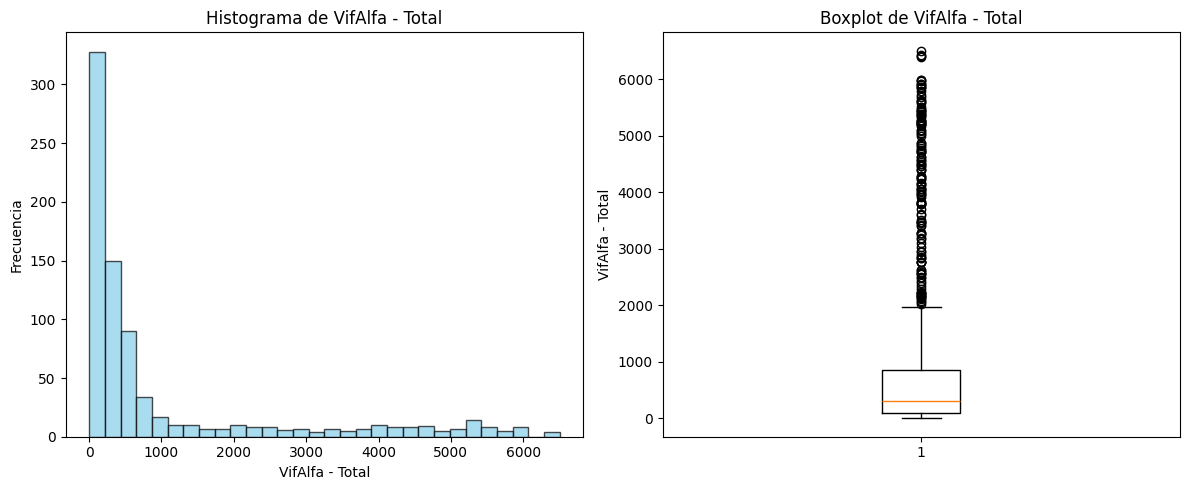

⚠️ La columna 'Alfabeta' tiene 7 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.31109965277739237699
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Alfabeta' NO provienen de una distribución normal.



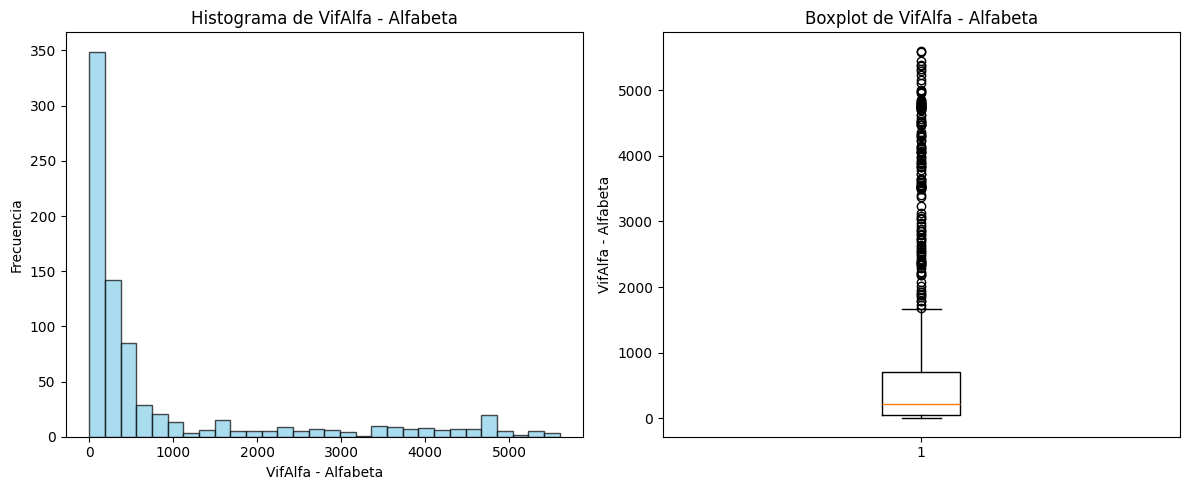

⚠️ La columna 'Analfabeta' tiene 39 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.26049970997823035379
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Analfabeta' NO provienen de una distribución normal.



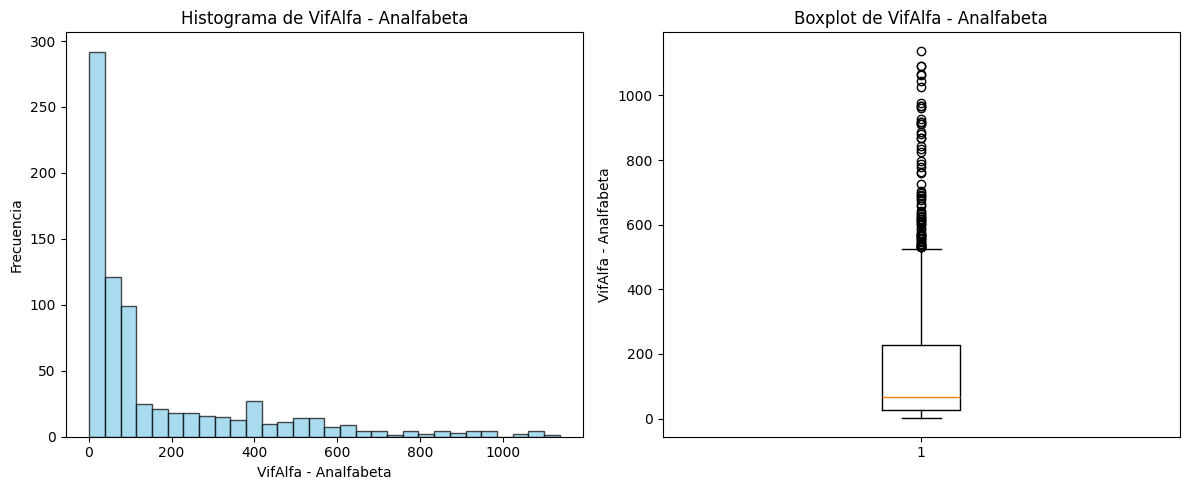

⚠️ La columna 'Ignorado' tiene 183 ceros en el archivo 'VifAlfa'.
Estadístico de prueba (ks_statistic) = 0.36361010098313217842
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAlfa - Ignorado' NO provienen de una distribución normal.



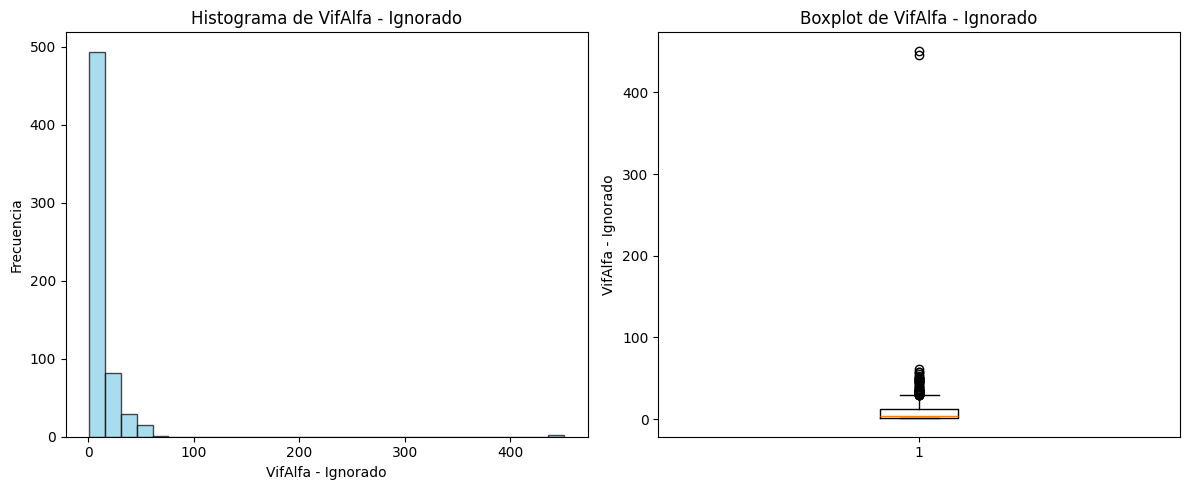

********************************************************************************************

🔹 **Analizando archivo: VifAreaSexoEdad**

Estadístico de prueba (ks_statistic) = 0.18704383510634464693
p-value = 0.00000000000014952987
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Total' NO provienen de una distribución normal.



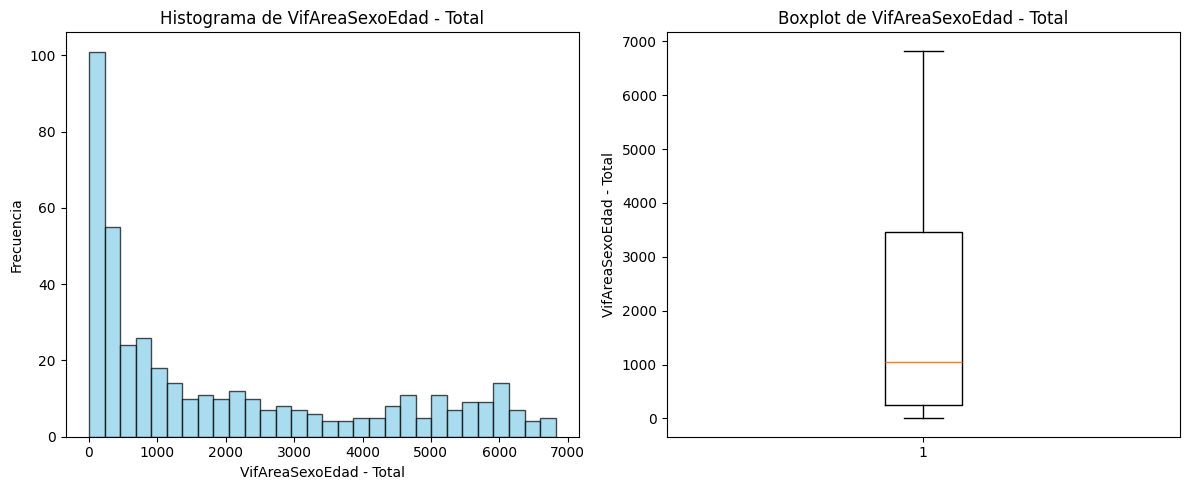

⚠️ La columna 'TotalH' tiene 1 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30045315270194727919
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - TotalH' NO provienen de una distribución normal.



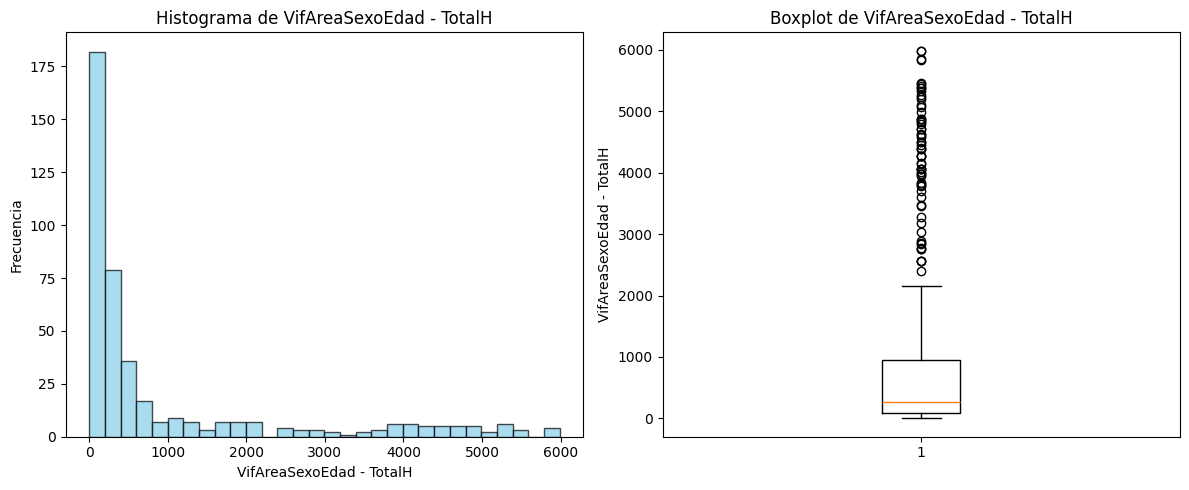

⚠️ La columna 'TotalM' tiene 4 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30695266376276220122
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - TotalM' NO provienen de una distribución normal.



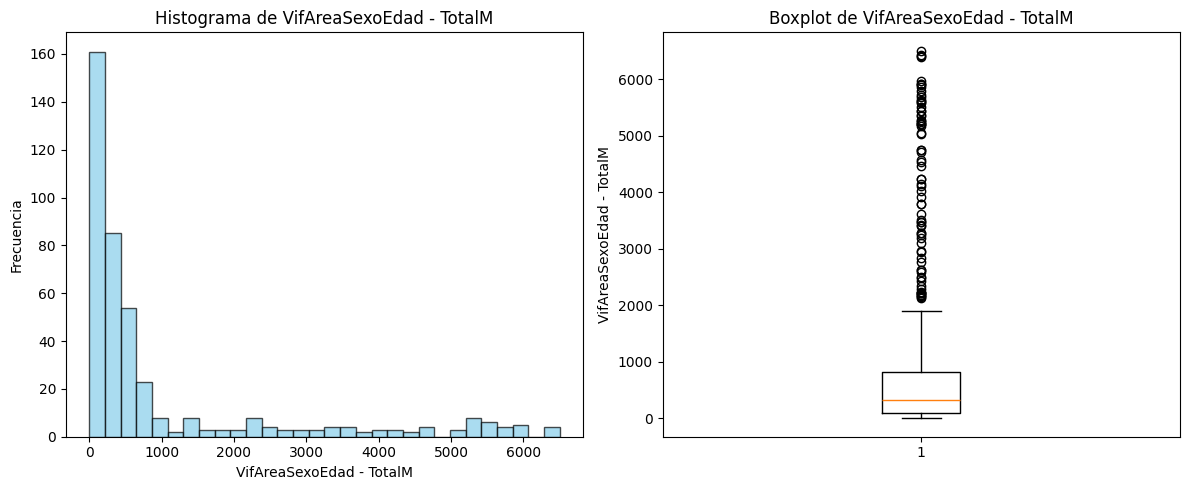

⚠️ La columna 'Urban' tiene 1 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.18599368318937914424
p-value = 0.00000000000022534665
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Urban' NO provienen de una distribución normal.



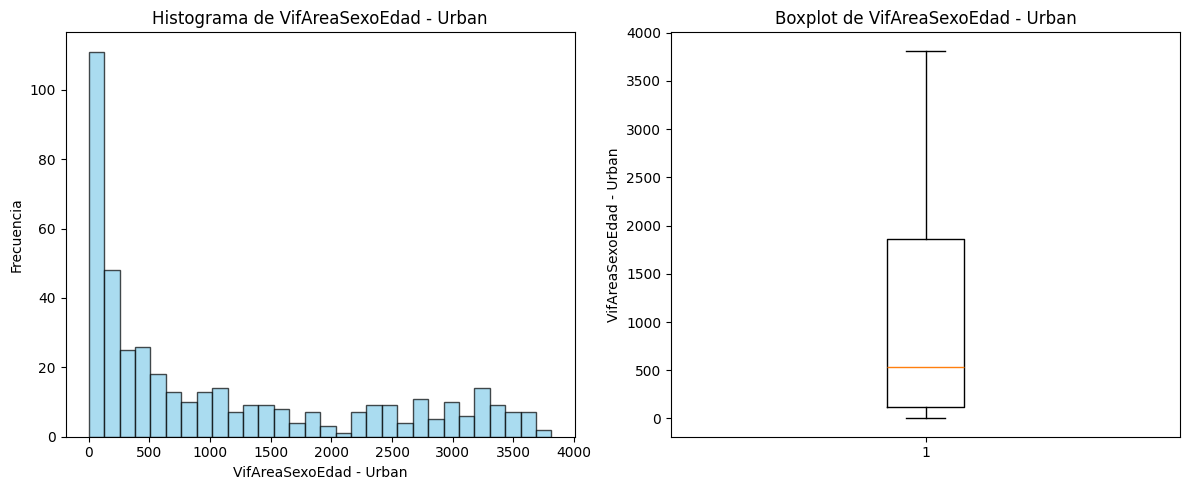

⚠️ La columna 'UrbanH' tiene 2 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30020542476148992517
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - UrbanH' NO provienen de una distribución normal.



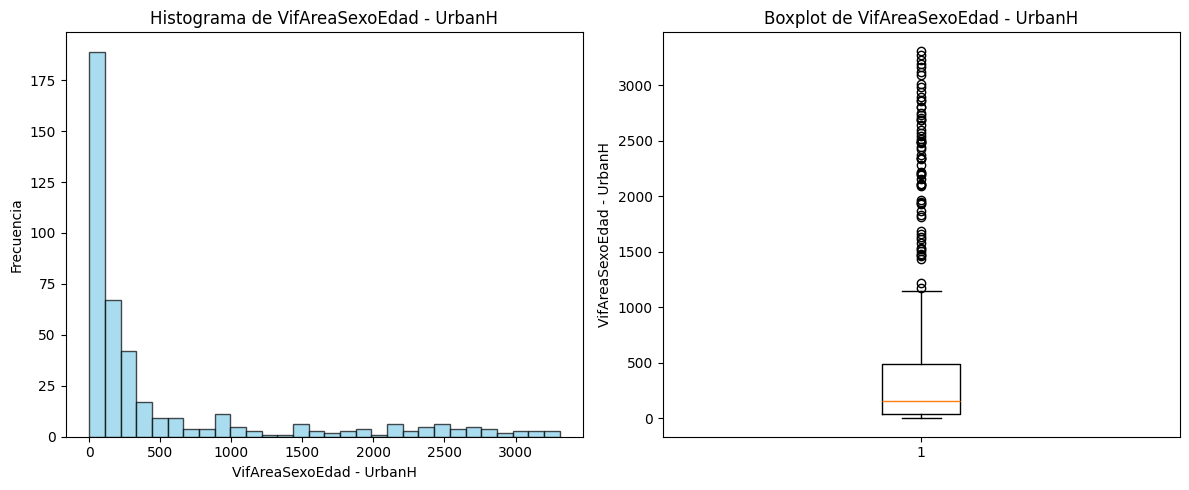

⚠️ La columna 'UrbanM' tiene 4 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30305666769737421573
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - UrbanM' NO provienen de una distribución normal.



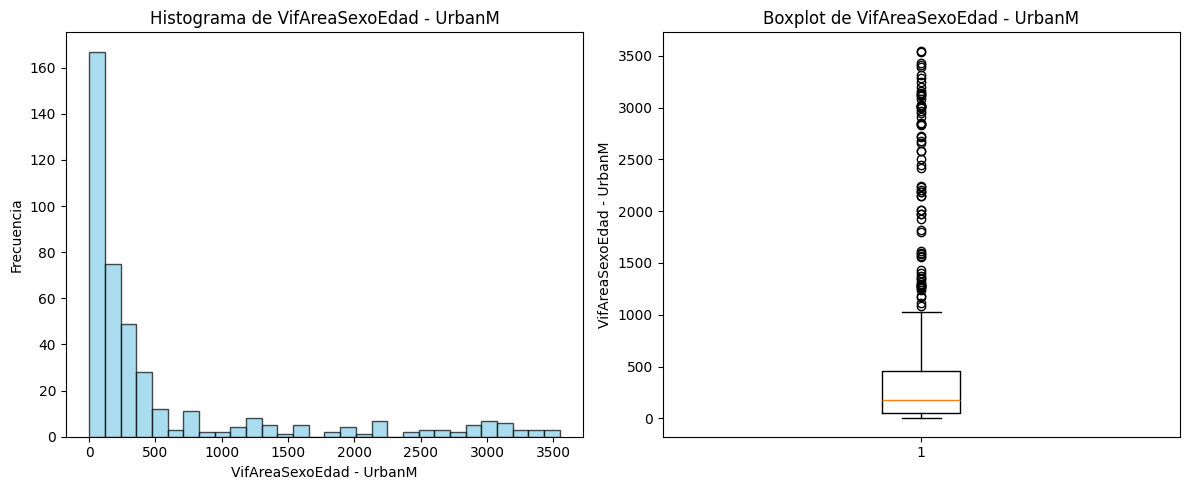

⚠️ La columna 'Rural' tiene 3 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.17517289164811161717
p-value = 0.00000000000752643278
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Rural' NO provienen de una distribución normal.



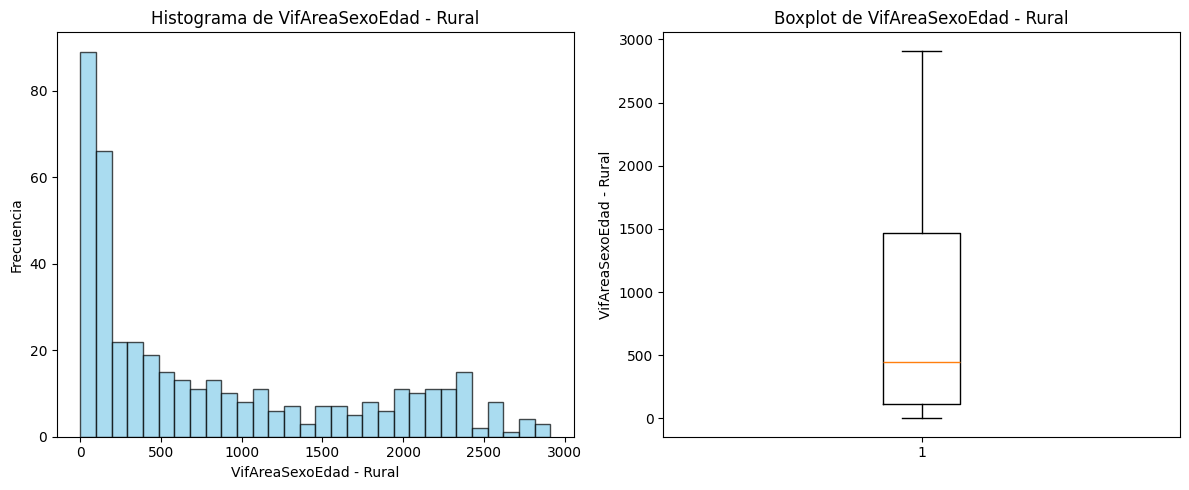

⚠️ La columna 'RuralH' tiene 3 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.29471984496539871401
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - RuralH' NO provienen de una distribución normal.



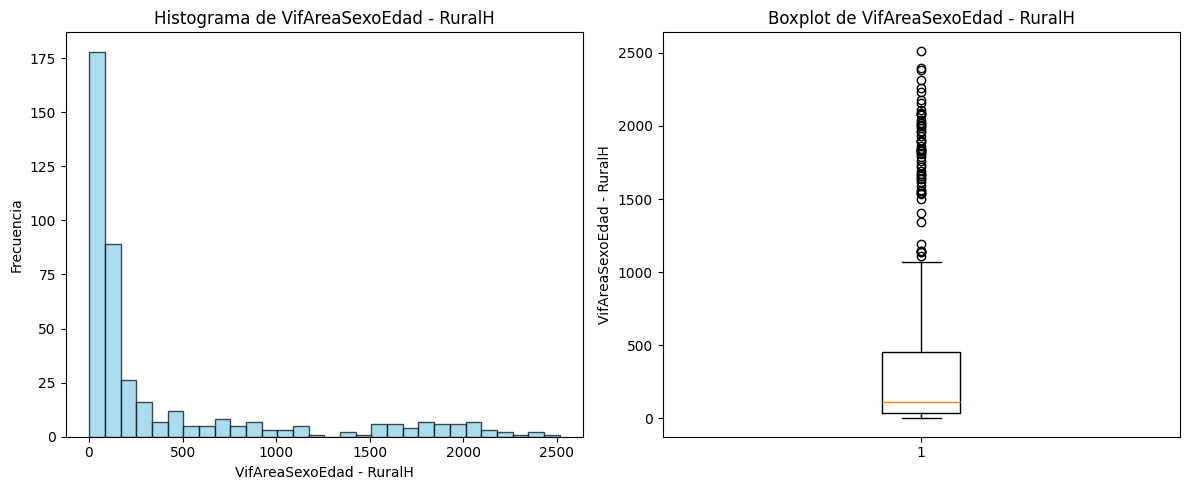

⚠️ La columna 'RuralM' tiene 8 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.30771411138028303967
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - RuralM' NO provienen de una distribución normal.



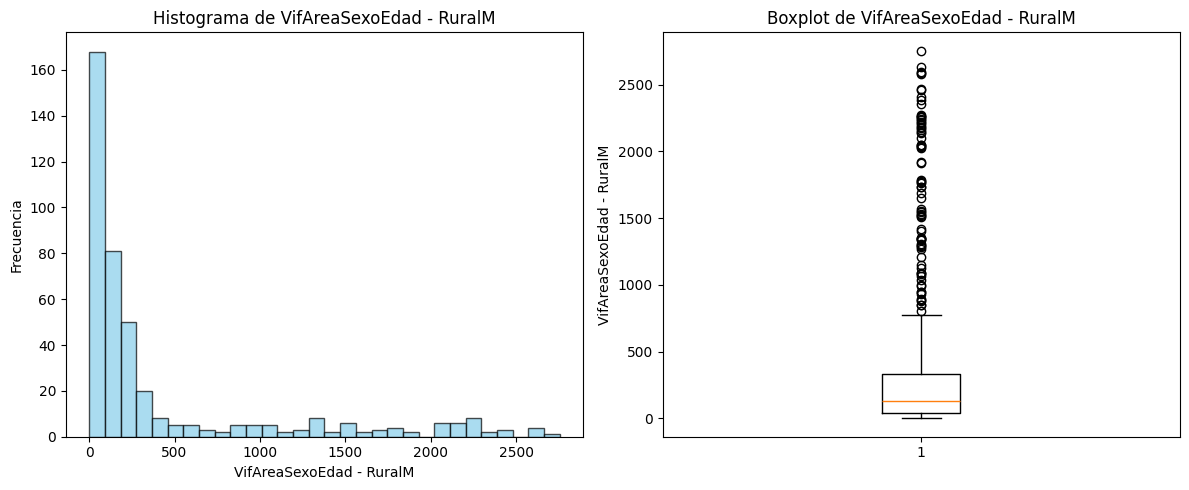

⚠️ La columna 'Ignorado' tiene 23 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.21701054598410784990
p-value = 0.00000000000000003496
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - Ignorado' NO provienen de una distribución normal.



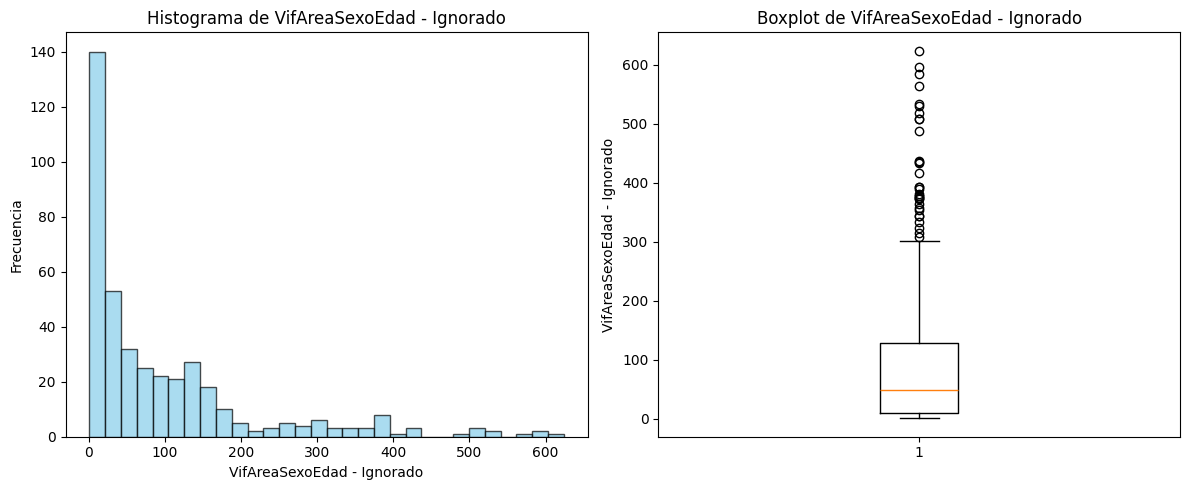

⚠️ La columna 'IgnoradoH' tiene 36 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.29134308958891785846
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - IgnoradoH' NO provienen de una distribución normal.



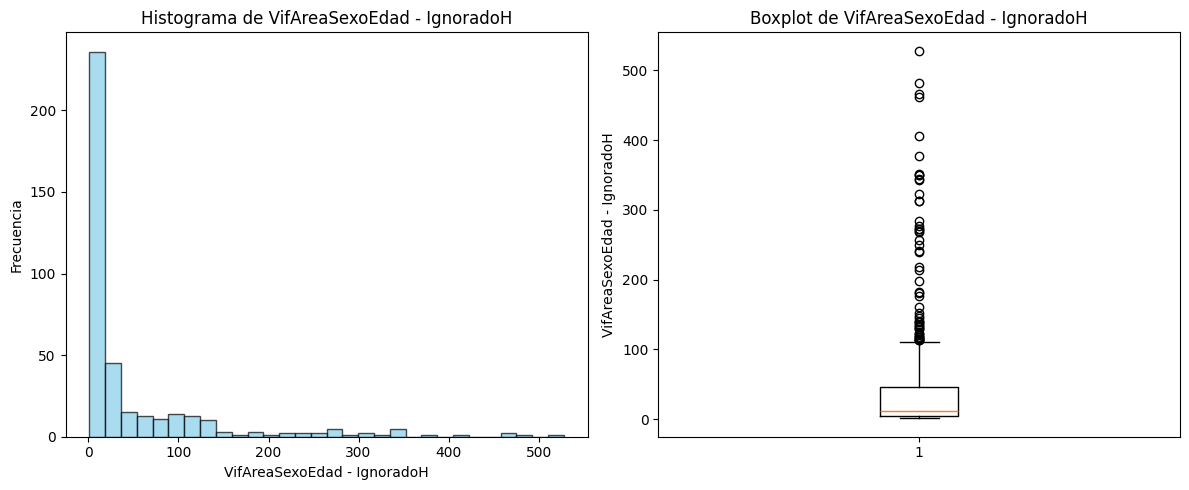

⚠️ La columna 'IgnoradoM' tiene 51 ceros en el archivo 'VifAreaSexoEdad'.
Estadístico de prueba (ks_statistic) = 0.29082343522153486504
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifAreaSexoEdad - IgnoradoM' NO provienen de una distribución normal.



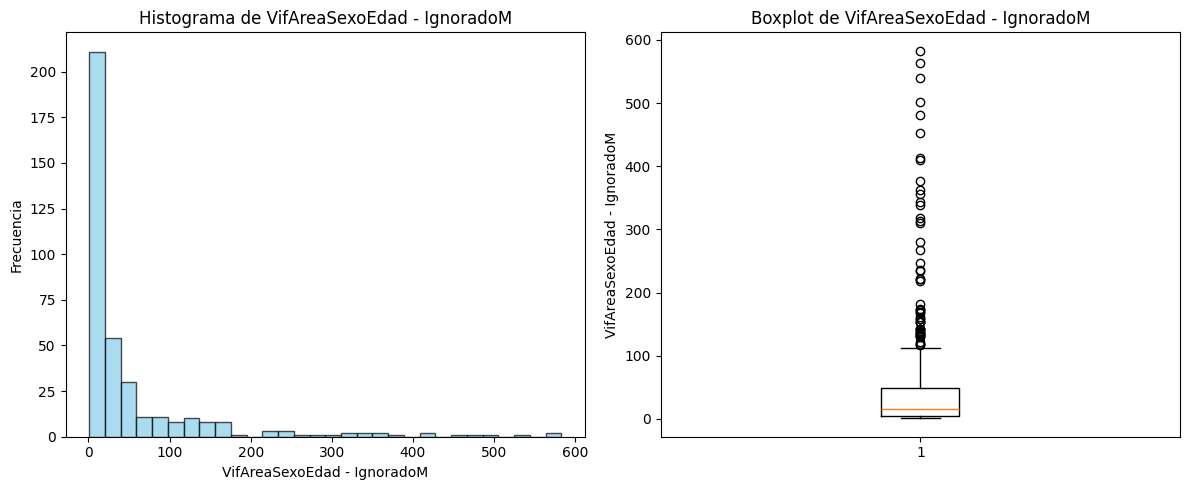

********************************************************************************************

🔹 **Analizando archivo: VifEscolaridad**

⚠️ La columna 'Total' tiene 5 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30318588077079811072
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Total' NO provienen de una distribución normal.



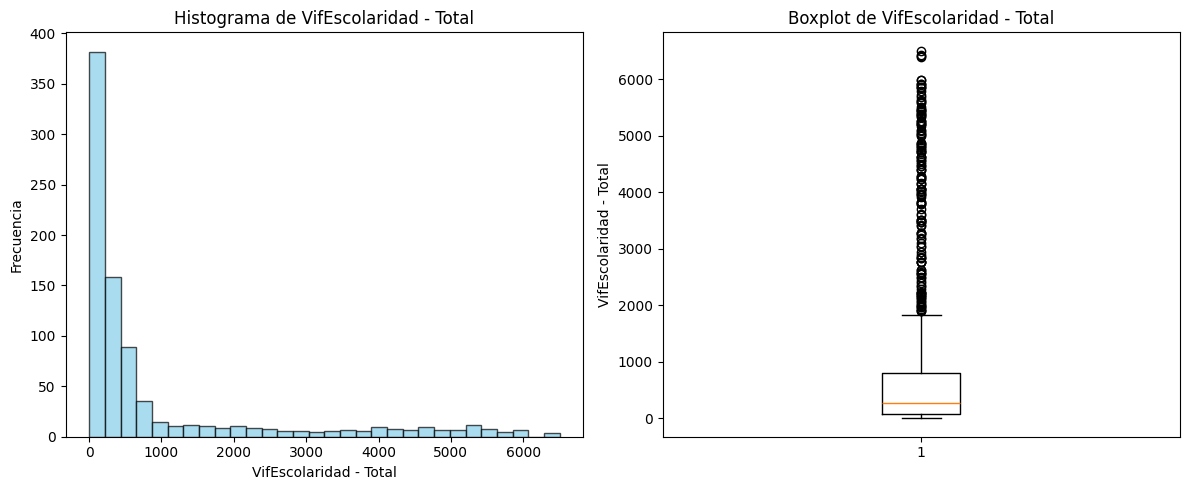

⚠️ La columna 'Ninguno' tiene 36 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.27522871985761571123
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Ninguno' NO provienen de una distribución normal.



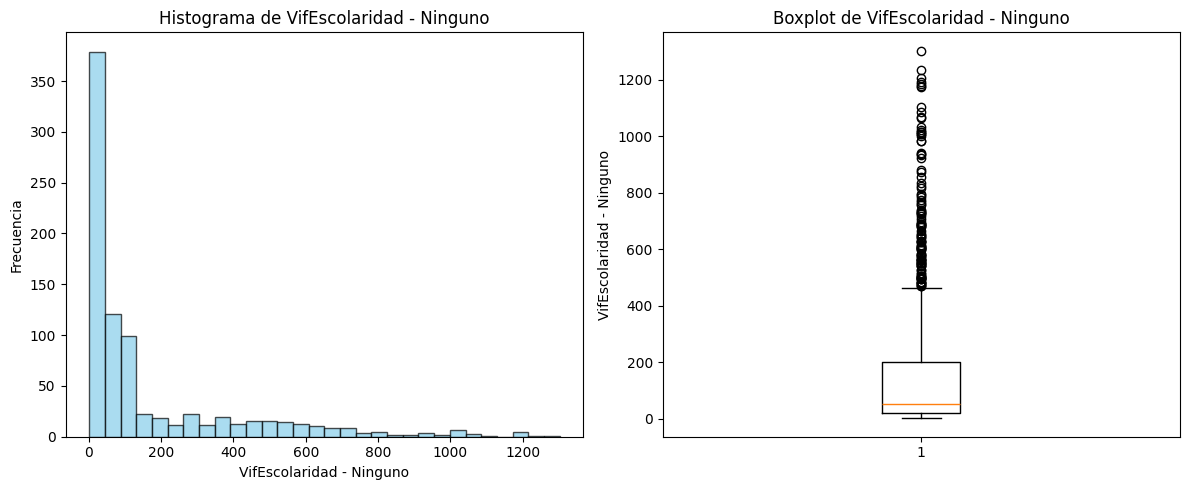

⚠️ La columna 'Primaria' tiene 11 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.29987947860417785151
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Primaria' NO provienen de una distribución normal.



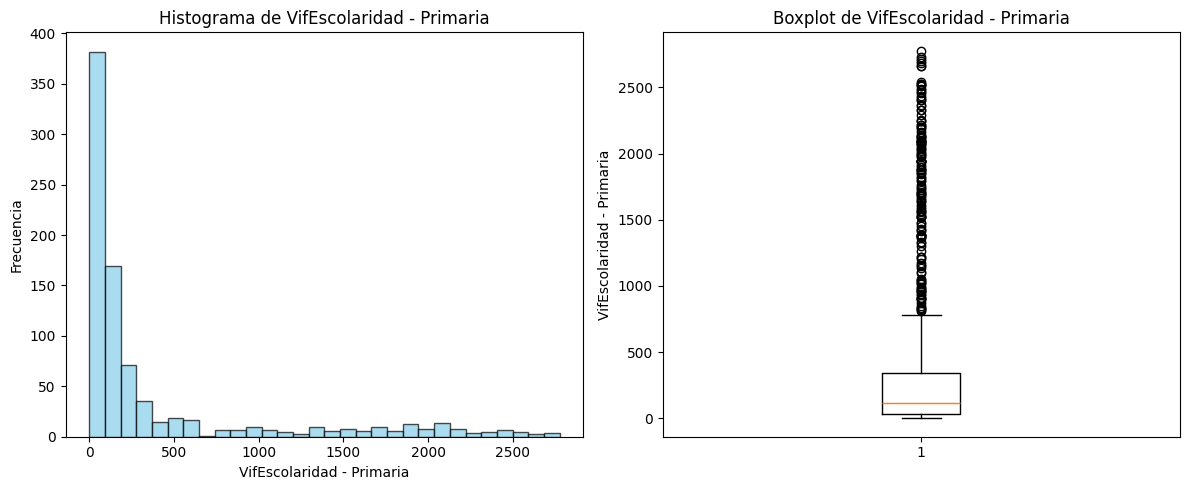

⚠️ La columna 'Básico' tiene 95 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30944844562310136471
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Básico' NO provienen de una distribución normal.



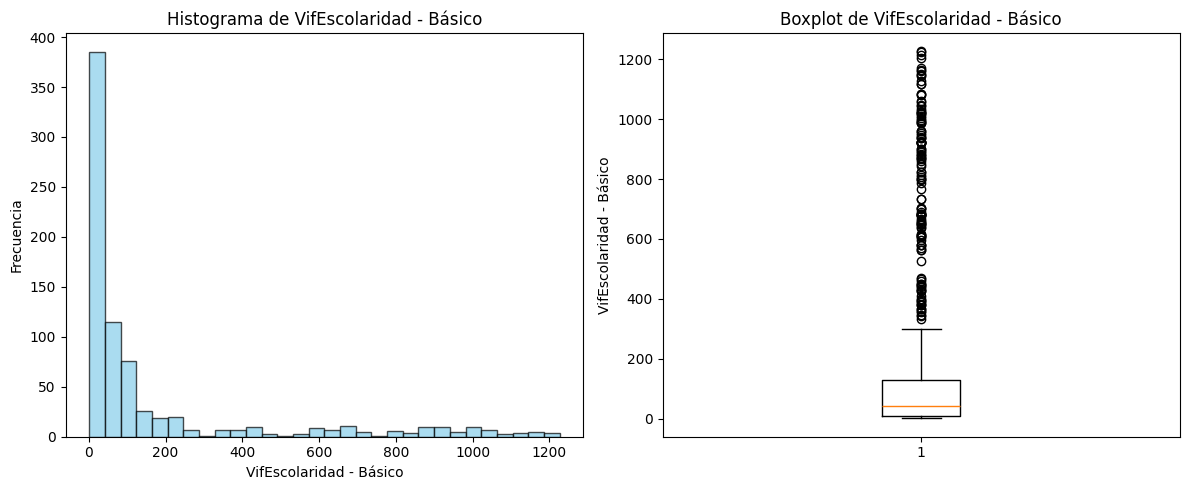

⚠️ La columna 'Diversificado' tiene 148 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.30062545296779369375
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Diversificado' NO provienen de una distribución normal.



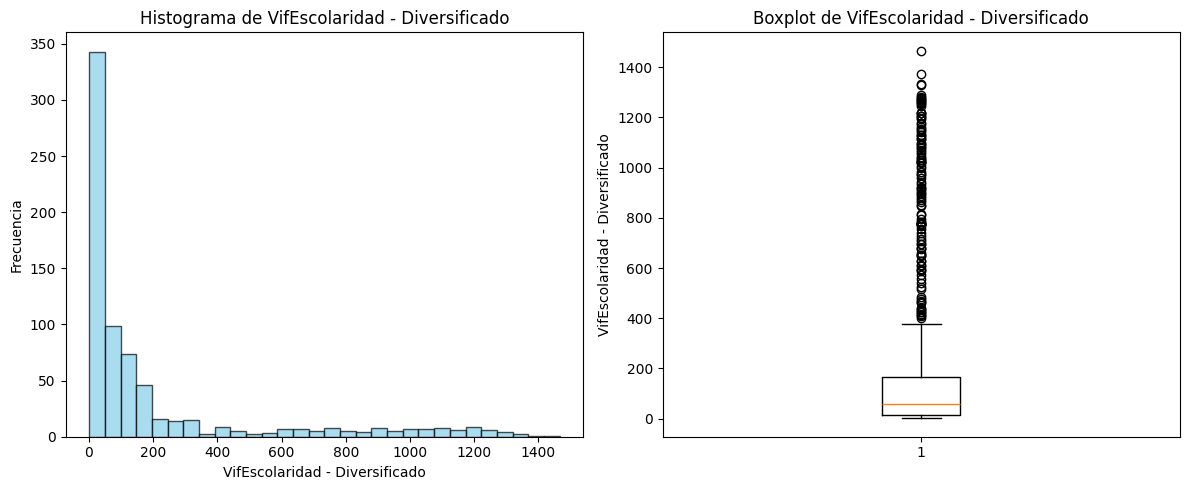

⚠️ La columna 'Universitario' tiene 210 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.25769583780657856487
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Universitario' NO provienen de una distribución normal.



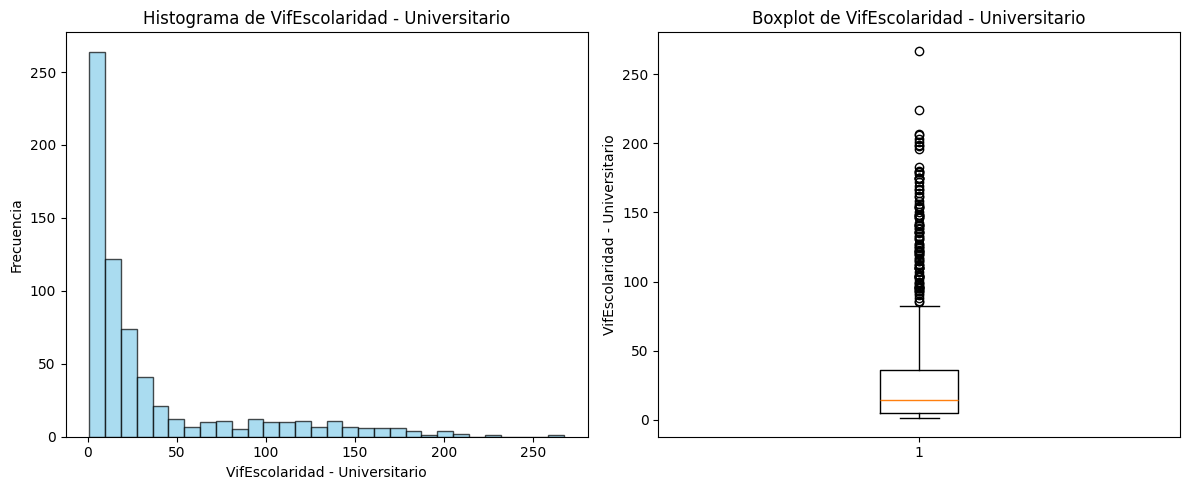

⚠️ La columna 'Ignorado' tiene 106 ceros en el archivo 'VifEscolaridad'.
Estadístico de prueba (ks_statistic) = 0.32512134417317395396
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifEscolaridad - Ignorado' NO provienen de una distribución normal.



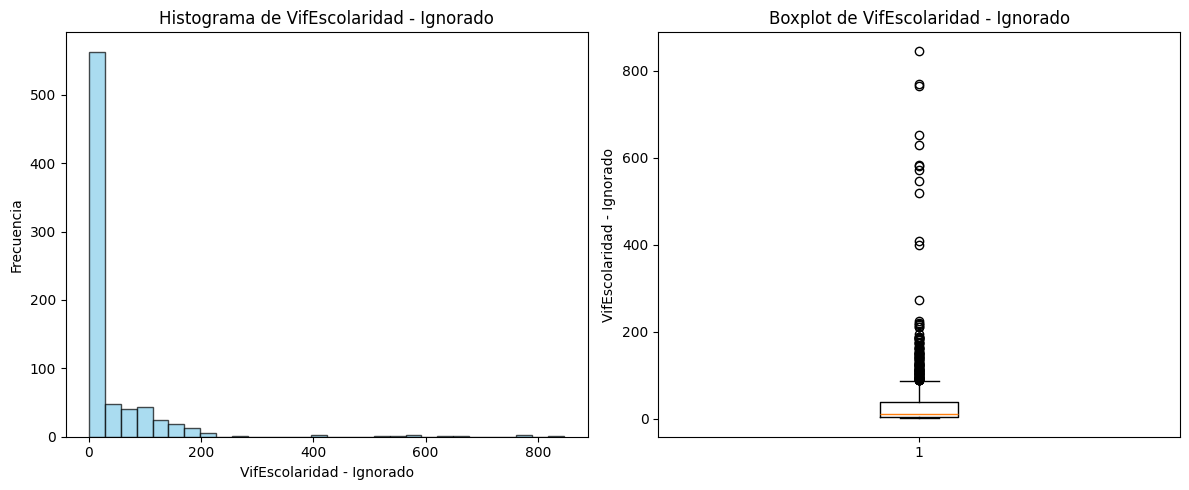

********************************************************************************************

🔹 **Analizando archivo: VifPuebloSexoRelacion**

Estadístico de prueba (ks_statistic) = 0.34157292332588035100
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Total' NO provienen de una distribución normal.



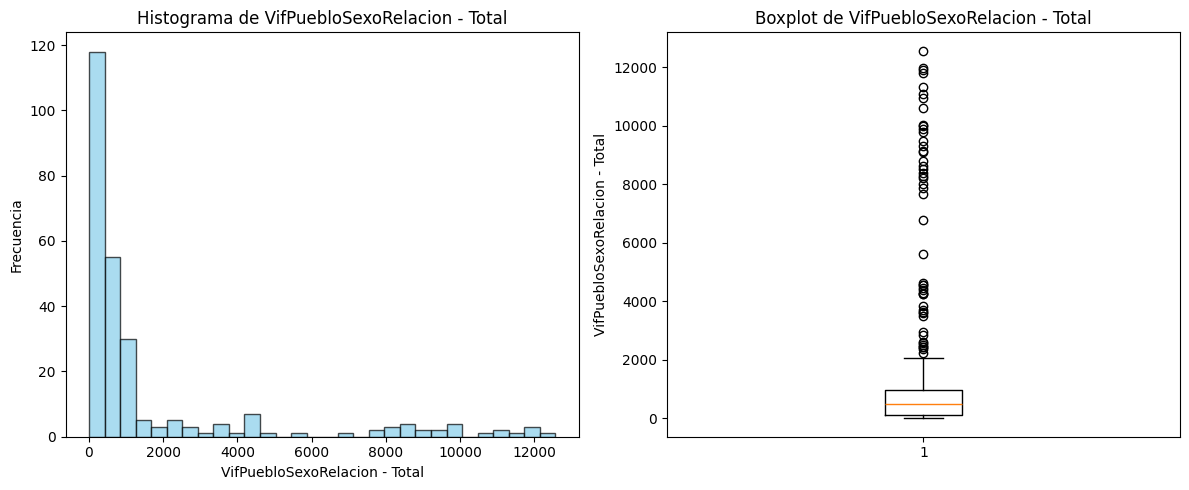

Estadístico de prueba (ks_statistic) = 0.34728655852876011423
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Ladinos(as)' NO provienen de una distribución normal.



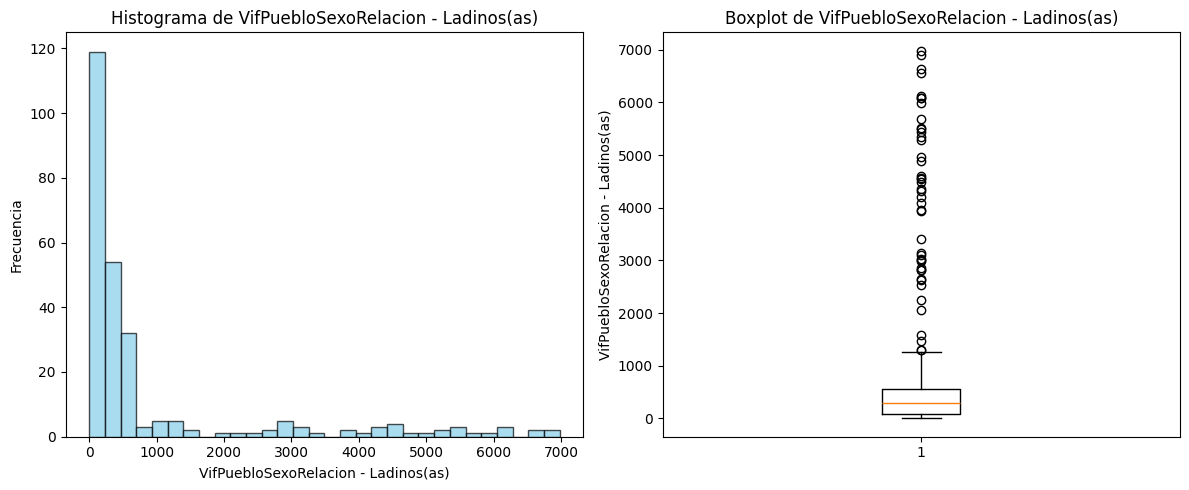

⚠️ La columna 'Mayas' tiene 5 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.31694767916773119998
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Mayas' NO provienen de una distribución normal.



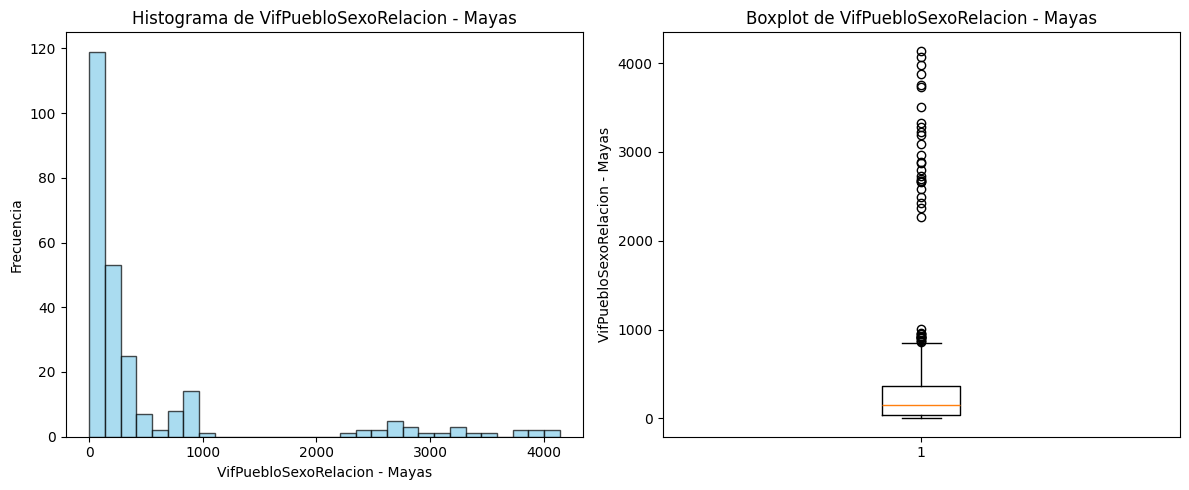

⚠️ La columna 'Garífunas' tiene 138 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.24092571847695964937
p-value = 0.00000102053104664072
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Garífunas' NO provienen de una distribución normal.



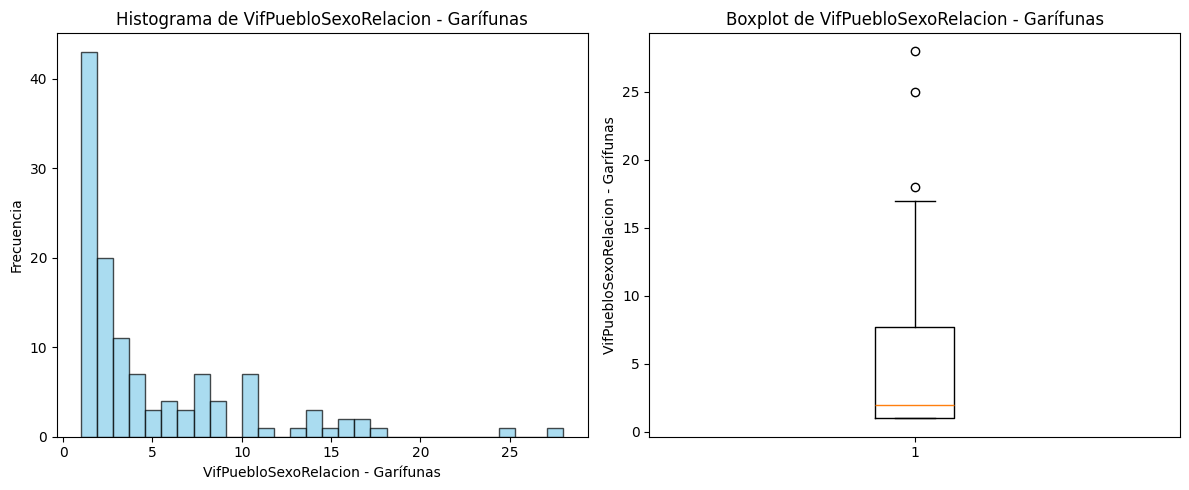

⚠️ La columna 'Xinkas' tiene 138 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.29099678314304600057
p-value = 0.00000000120657717984
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Xinkas' NO provienen de una distribución normal.



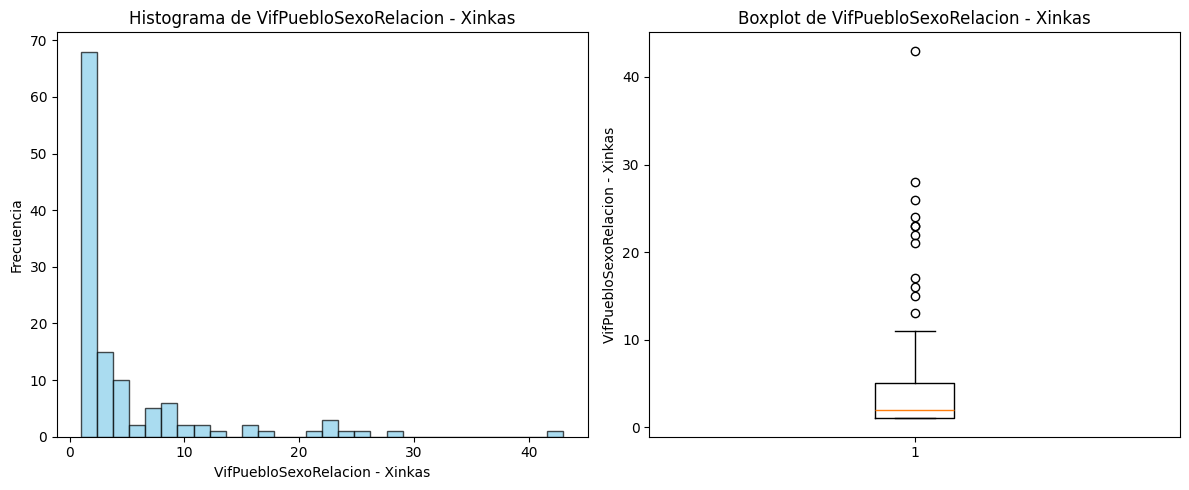

⚠️ La columna 'Otro' tiene 88 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.28673192746887049553
p-value = 0.00000000000051878957
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Otro' NO provienen de una distribución normal.



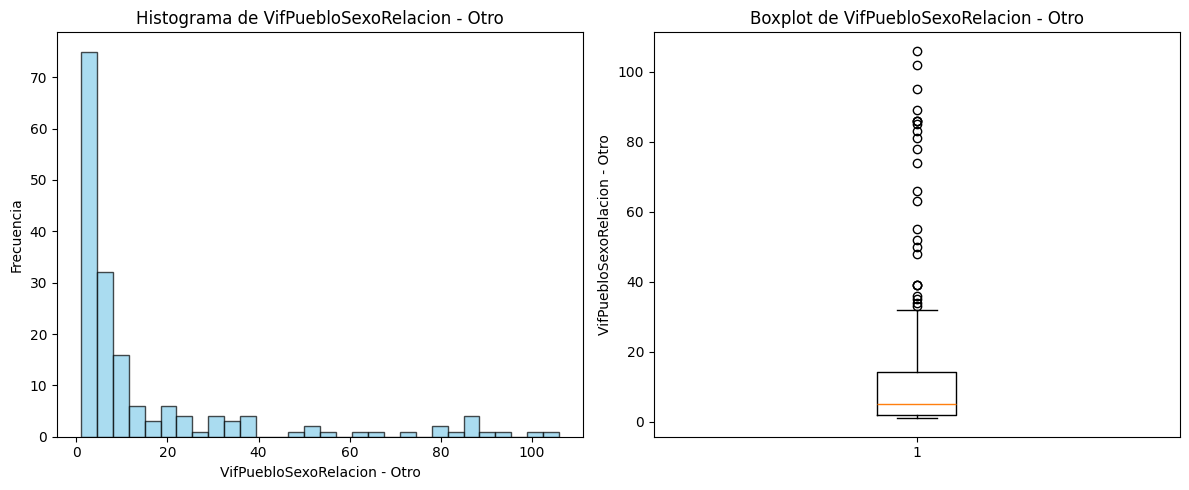

⚠️ La columna 'No indica' tiene 7 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.34086069066334540034
p-value = 0.00000000000000000000
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - No indica' NO provienen de una distribución normal.



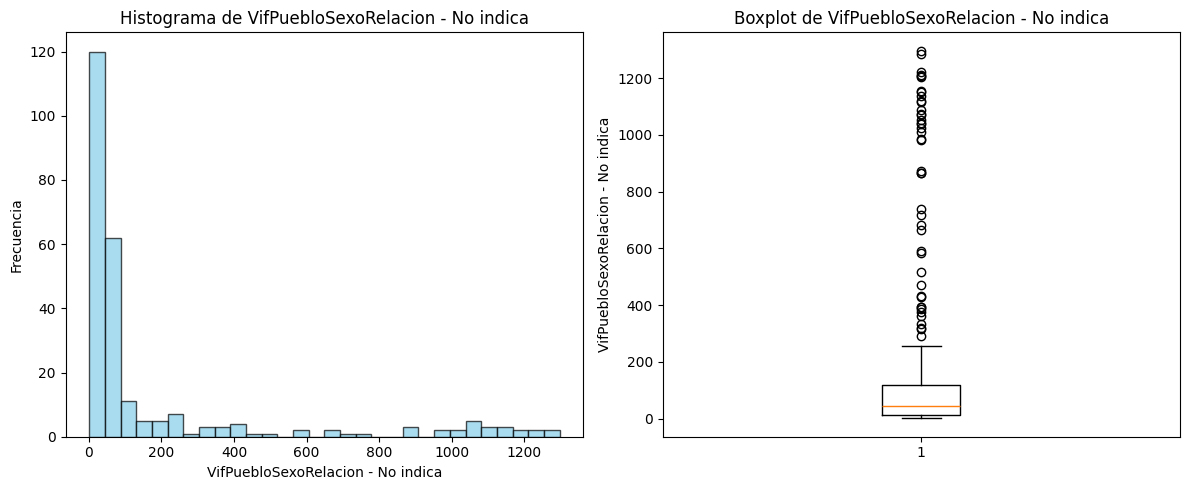

⚠️ La columna 'Ignorado' tiene 32 ceros en el archivo 'VifPuebloSexoRelacion'.
Estadístico de prueba (ks_statistic) = 0.29878973354233095971
p-value = 0.00000000000000000152
Se rechaza la hipótesis nula: los datos de 'VifPuebloSexoRelacion - Ignorado' NO provienen de una distribución normal.



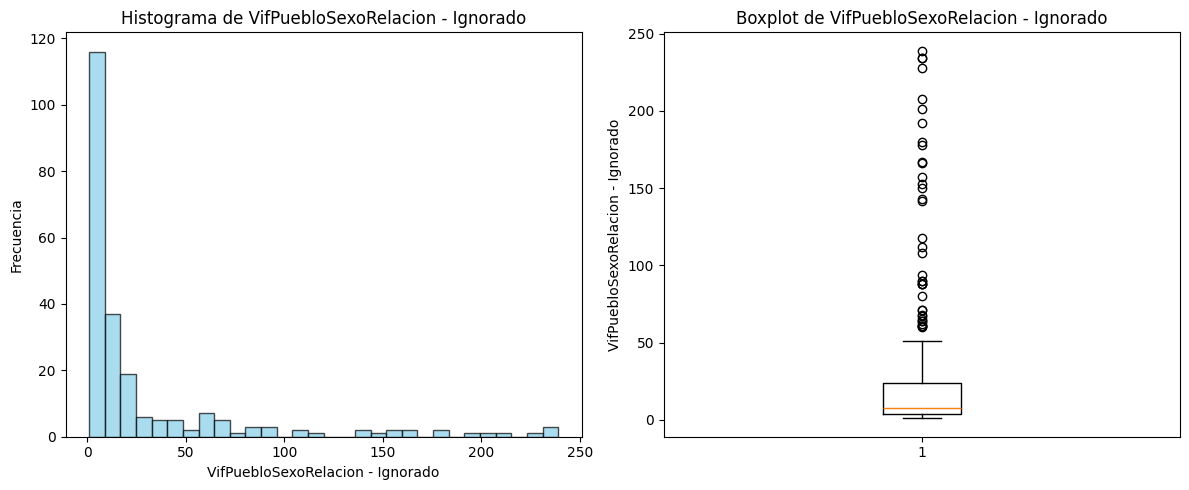

In [14]:
import normalidad

palabras_excluir = ["Total"]

for name, df in dfs.items():
    print("********************************************************************************************")
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cuantitiativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cuantitiativas.remove('Anio')
    
   
     # Filtrar filas que contengan "Todos" o "Todas" en cualquier columna categórica
    df_filtrado = df[~df.select_dtypes(include=[object]).apply(lambda x: x.str.contains('|'.join(palabras_excluir), na=False)).any(axis=1)]
    
    for column in cuantitiativas:  # Solo columnas numéricas
        # Contar los ceros en la columna original
        num_zeros = (df_filtrado[column] == 0).sum()
        
        # Mostrar el número de ceros
        if num_zeros > 0:
            print(f"⚠️ La columna '{column}' tiene {num_zeros} ceros en el archivo '{name}'.")
        
        # Filtrar los ceros de la columna antes de la prueba
        df_filtrado_column = df_filtrado[column].loc[df_filtrado[column] != 0]
        
        # Realizar la prueba solo si hay datos disponibles después de filtrar los ceros
        if not df_filtrado_column.empty:
            normalidad.prueba_de_normalidad(df_filtrado_column, f"{name} - {column}")
        else:
            print(f"⚠️ No hay datos suficientes para realizar la prueba de normalidad en '{name} - {column}' después de eliminar ceros.\n")

       

### Frecuencia


🔹 **Analizando archivo: VifAlfa**



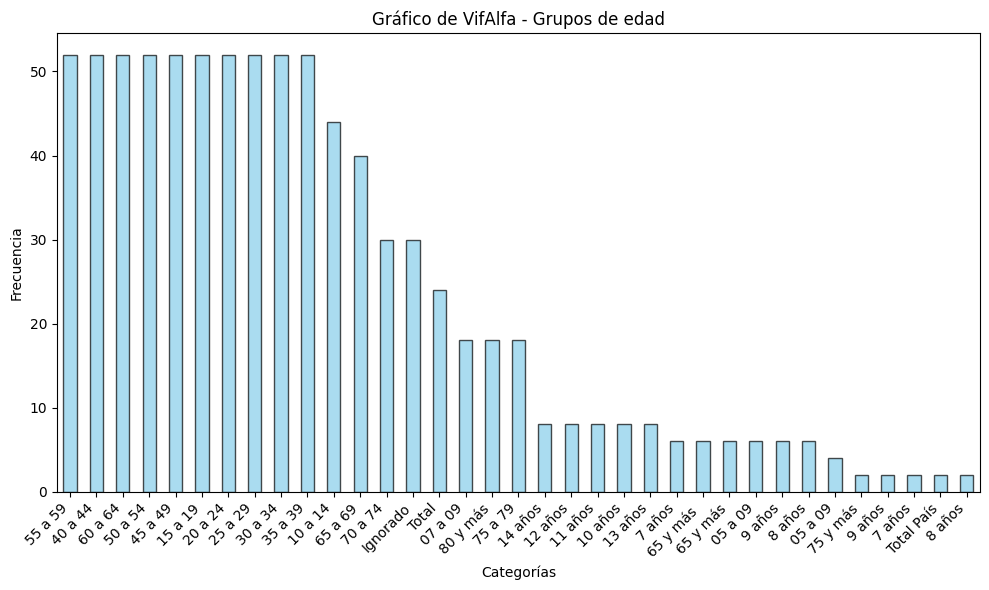

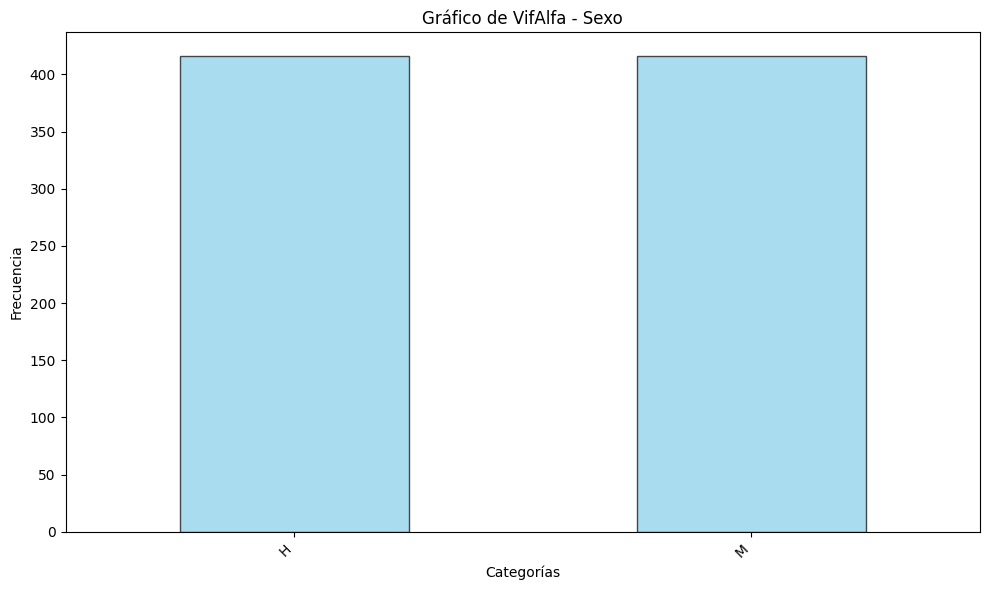

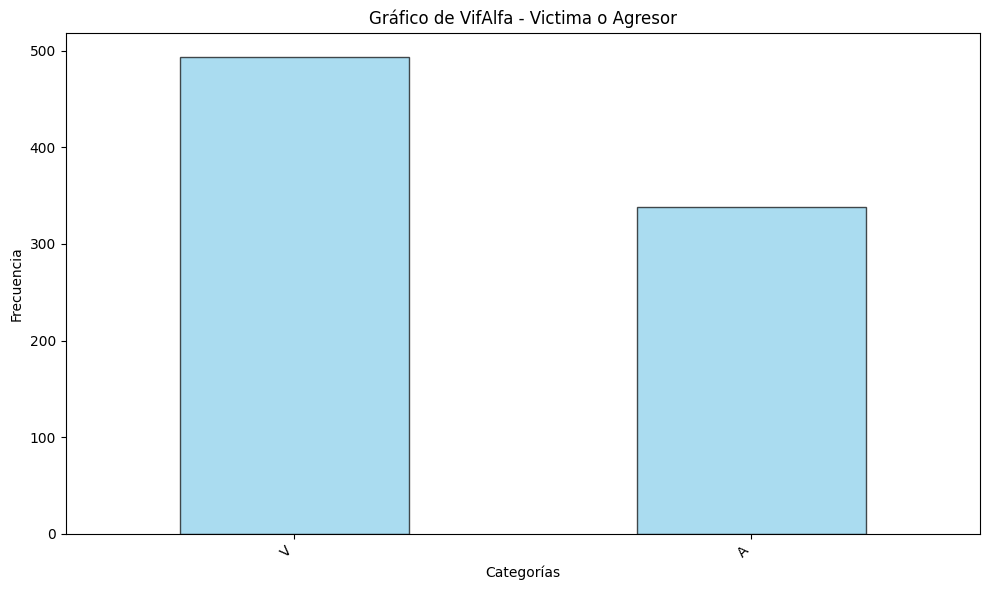

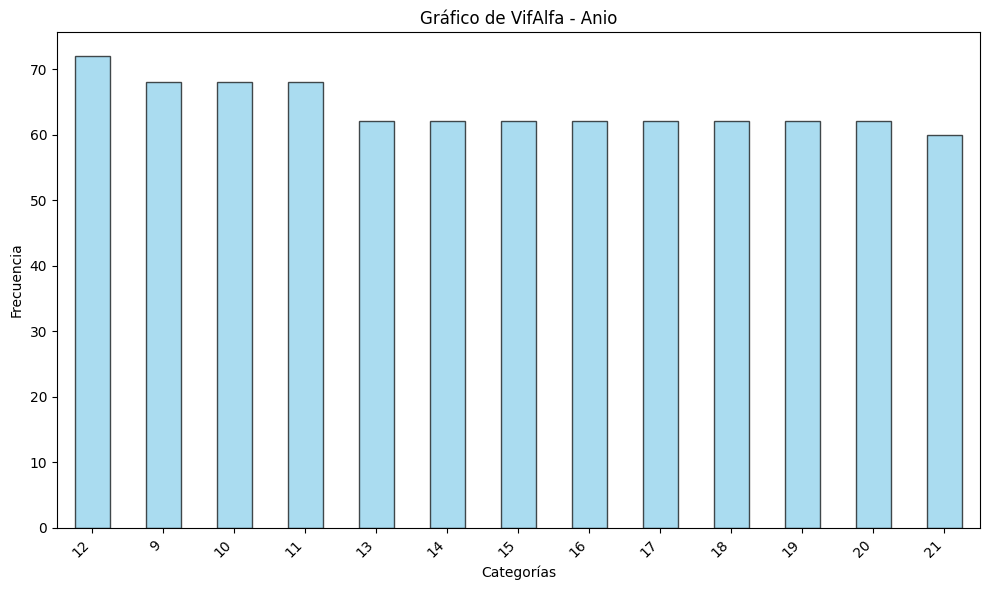


🔹 **Analizando archivo: VifAreaSexoEdad**



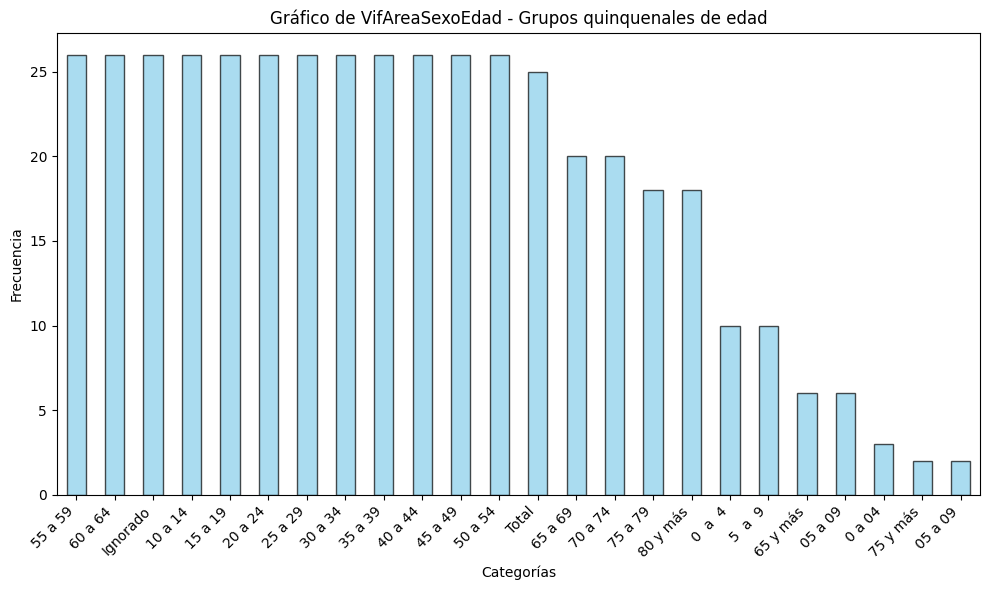

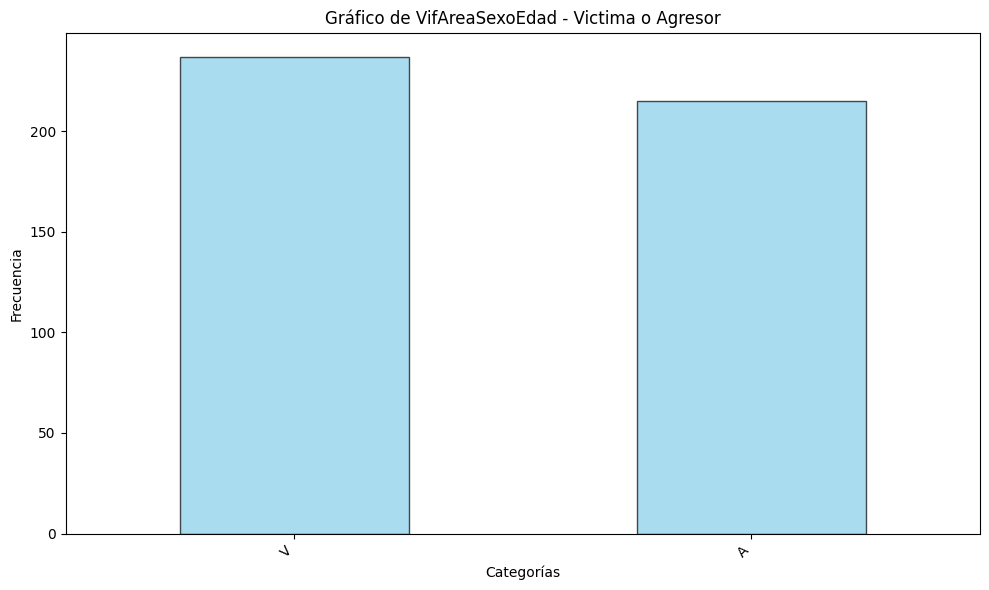

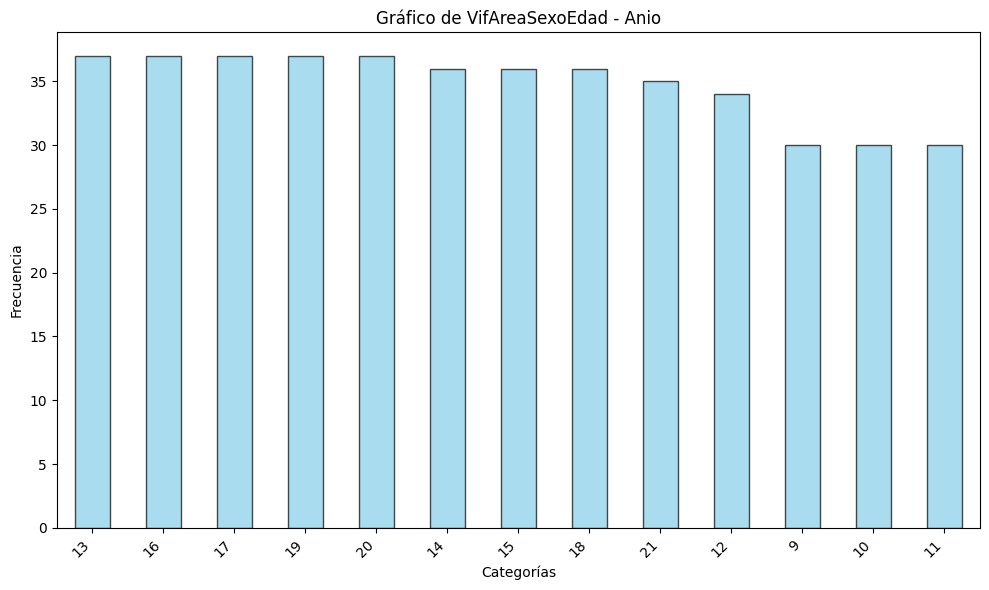


🔹 **Analizando archivo: VifEscolaridad**



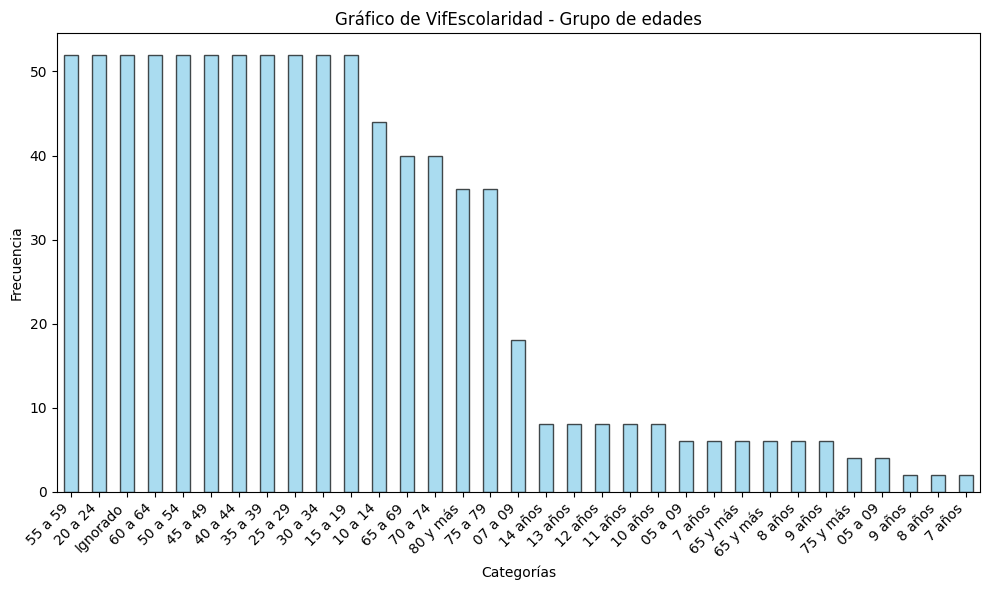

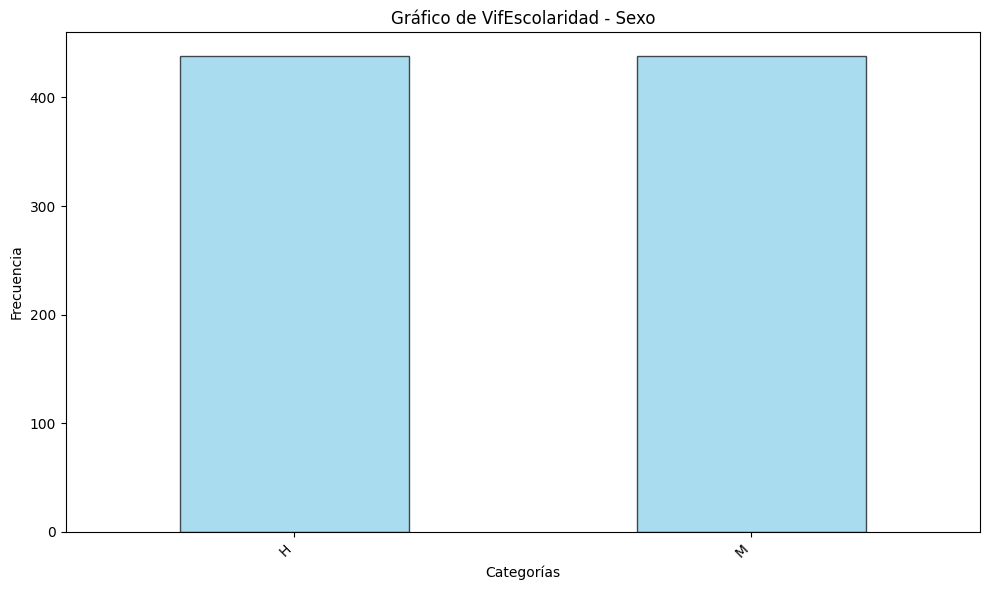

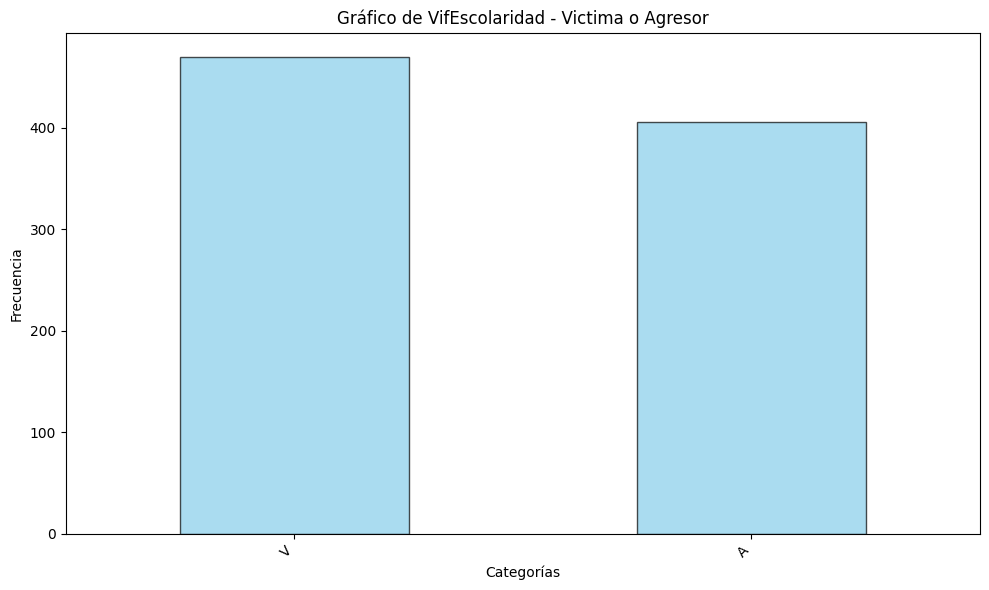

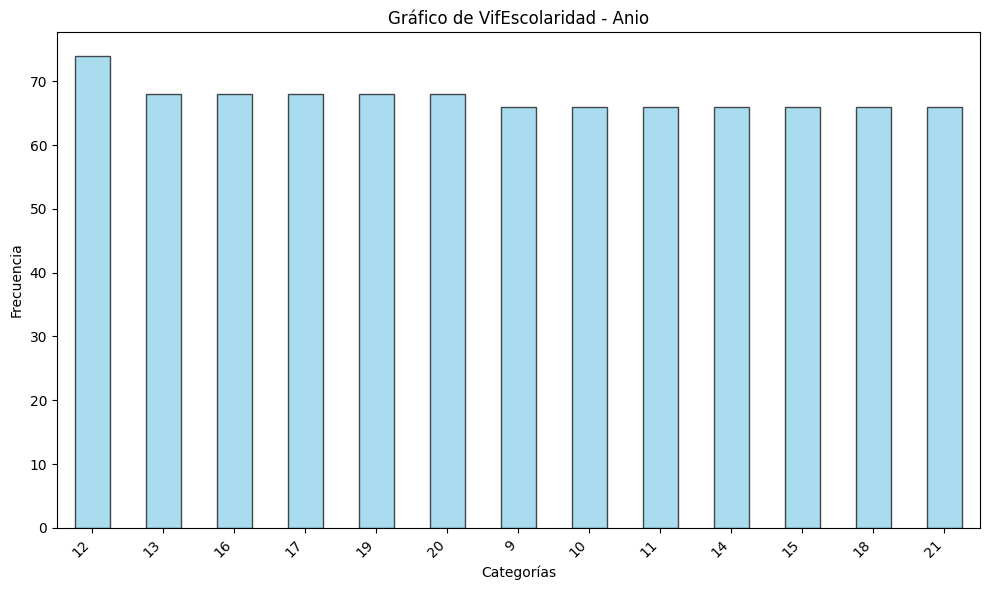


🔹 **Analizando archivo: VifPuebloSexoRelacion**



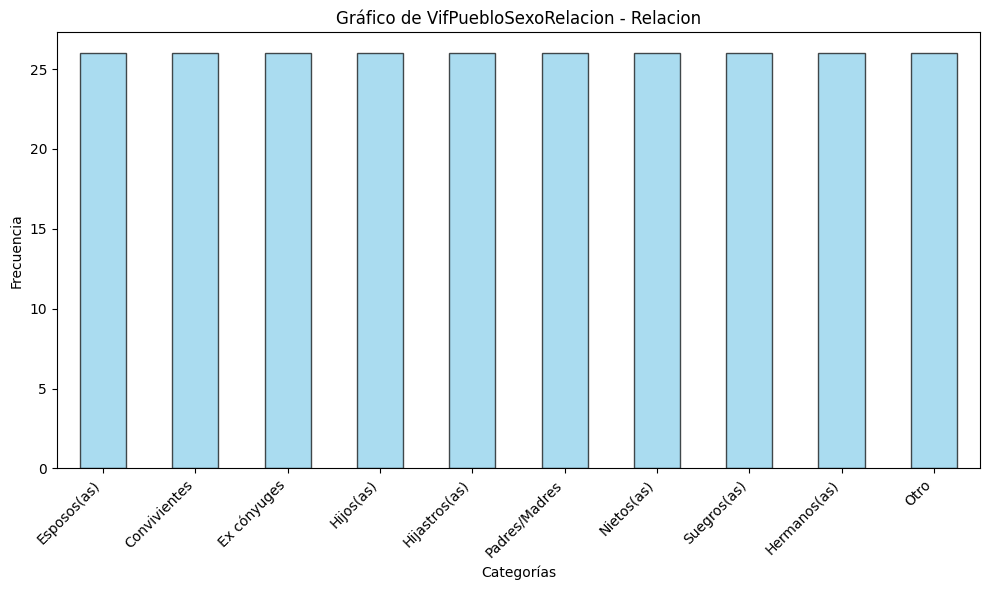

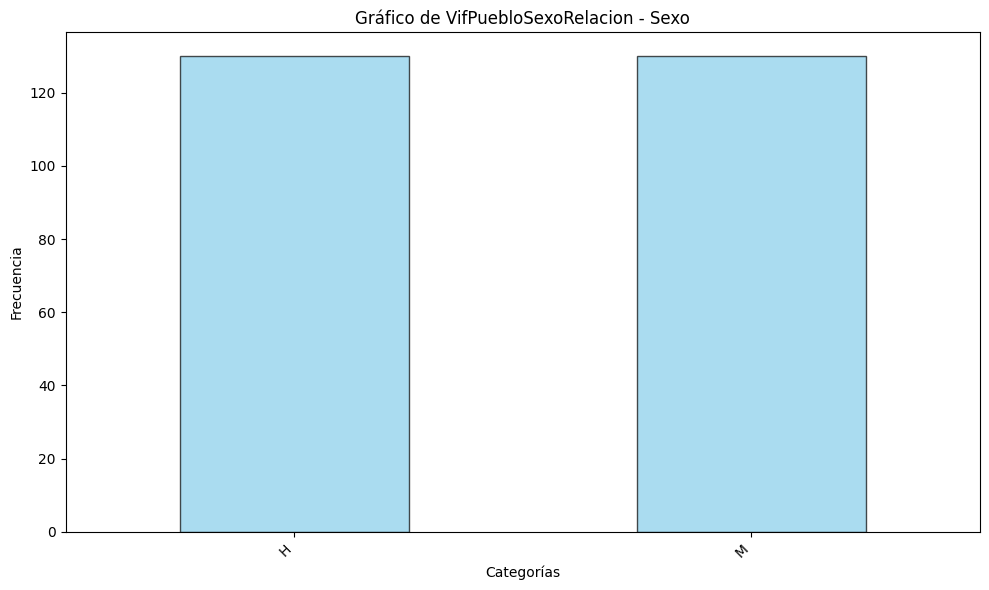

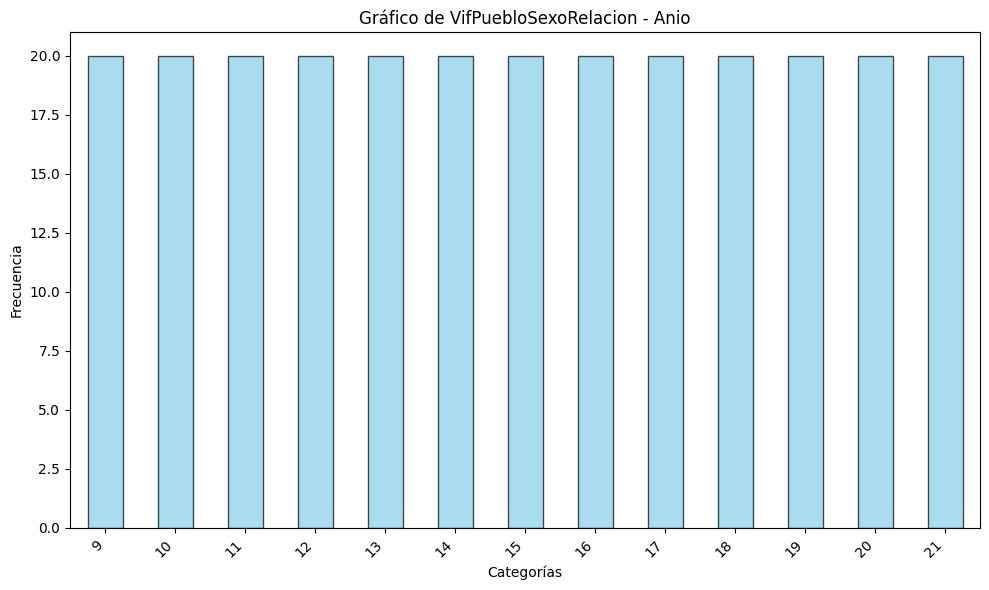

In [15]:
for name, df in dfs.items():
    print(f"\n🔹 **Analizando archivo: {name}**\n")
    cualitativas = df.select_dtypes(include=['object']).columns.tolist()
    cualitativas.append('Anio')
    
    for column in cualitativas:  # Solo columnas numéricas
        normalidad.frecuencias(df[column], f"{name} - {column}")

### Gráficos Exploratorios

#### Clusters 

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Función base para clustering
def hacer_clustering(df, nombre_dataset, variables_numericas, rango_k=(2, 6)):
    print(f"\n🔍 Clustering para: {nombre_dataset}")
    
    # 1. Copiar y convertir columnas numéricas
    df_cluster = df[variables_numericas].copy()
    for col in df_cluster.columns:
        df_cluster[col] = pd.to_numeric(df_cluster[col], errors='coerce')
    df_cluster = df_cluster.dropna()

    # 2. Escalado
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cluster)

    # 3. Silhouette por k
    sil_scores = {}
    for k in range(rango_k[0], rango_k[1] + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        sil_scores[k] = score

    best_k = max(sil_scores, key=sil_scores.get)
    print(f"⭐ Mejor número de clusters según silueta: {best_k} (score = {sil_scores[best_k]:.3f})")

    kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init='auto')
    labels = kmeans_final.fit_predict(X_scaled)

    df_resultado = df_cluster.copy()
    df_resultado["Cluster"] = labels

    cluster_stats = df_resultado.groupby("Cluster").mean()
    display(cluster_stats)

    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(sil_scores.keys()), y=list(sil_scores.values()))
    plt.title(f"Puntaje de Silueta por número de Clusters - {nombre_dataset}")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.show()

    return df_resultado, cluster_stats




🔍 Clustering para: VifAlfa
⭐ Mejor número de clusters según silueta: 3 (score = 0.939)


,Total,Alfabeta,Analfabeta,Ignorado
Cluster,,,,
0,1055.370869,885.807834,162.187271,7.375765
1,28893.500000,23151.583333,5584.666667,157.250000
2,11321.333333,9201.333333,1564.666667,555.333333


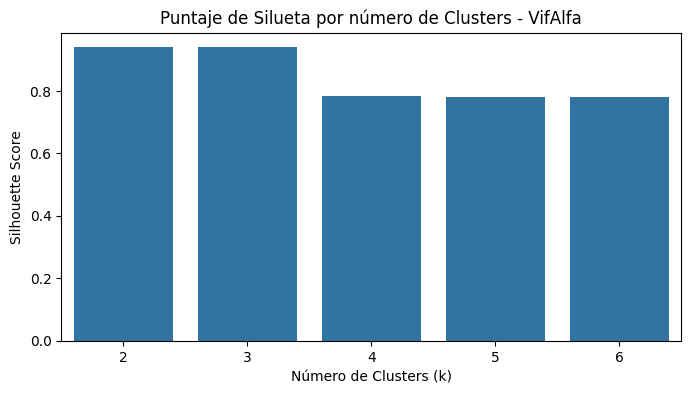

In [9]:
variables_vifalfa = ["Total", "Alfabeta", "Analfabeta", "Ignorado"]
df_resultado_alfa, stats_alfa = hacer_clustering(dfs["VifAlfa"], "VifAlfa", variables_vifalfa)


🔍 Clustering para: VifSexoEdad
⭐ Mejor número de clusters según silueta: 3 (score = 0.909)


,Total,TotalH,TotalM,Urban,UrbanH,UrbanM,Rural,RuralH,RuralM
Cluster,,,,,,,,,
0,1989.161972,970.697183,1018.464789,1078.377934,523.983568,554.394366,819.816901,402.157277,417.659624
1,32591.692308,3468.384615,29123.307692,17668.846154,1909.615385,15759.230769,13432.384615,1418.615385,12013.769231
2,32271.416667,28181.500000,4089.916667,17549.083333,15212.583333,2336.500000,13193.750000,11610.833333,1582.916667


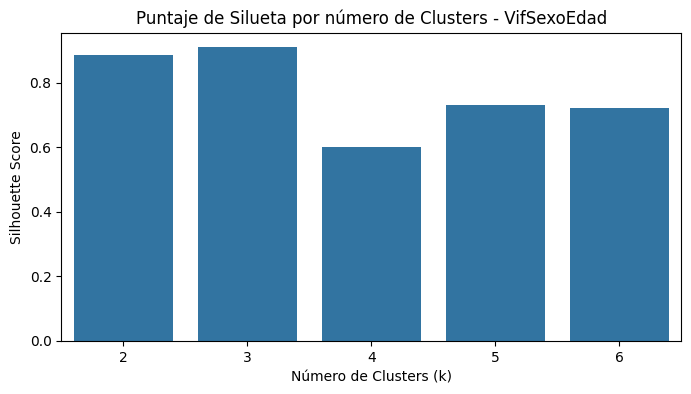

In [10]:
variables_vifsexoedad = [
    "Total", "TotalH", "TotalM",
    "Urban", "UrbanH", "UrbanM",
    "Rural", "RuralH", "RuralM"
]
df_resultado_sexoedad, stats_sexoedad = hacer_clustering(
    dfs["VifAreaSexoEdad"],
    "VifSexoEdad",
    variables_vifsexoedad
)



🔍 Clustering para: VifEscolaridad
⭐ Mejor número de clusters según silueta: 3 (score = 0.800)


,Total,Ninguno,Primaria,Básico,Diversificado,Universitario,Ignorado
Cluster,,,,,,,
0,349.514946,79.327446,148.716033,47.653533,51.399457,10.764946,11.653533
1,4363.671875,626.625000,1885.046875,766.656250,849.515625,117.375000,118.453125
2,1740.250000,347.166667,479.250000,137.500000,148.666667,21.833333,605.833333


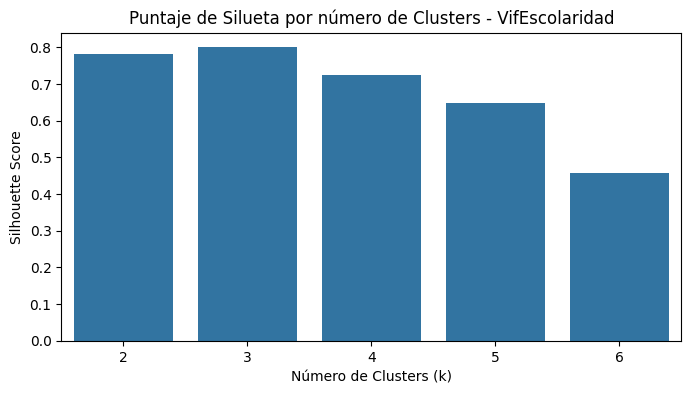

In [11]:
variables_escolaridad = [
    "Total", "Ninguno", "Primaria", "Básico",
    "Diversificado", "Universitario", "Ignorado"
]

df_resultado_escolaridad, stats_escolaridad = hacer_clustering(
    dfs["VifEscolaridad"],
    "VifEscolaridad",
    variables_escolaridad
)



🔍 Clustering para: VifPuebloSexoRelacion
⭐ Mejor número de clusters según silueta: 2 (score = 0.803)


,Total,Ladinos(as),Mayas,Garífunas,Xinkas,Otro,No indica,Ignorado
Cluster,,,,,,,,
0,608.716814,347.022124,183.615044,0.942478,0.809735,3.486726,61.809735,11.030973
1,8415.352941,4730.235294,2561.323529,10.911765,12.205882,53.941176,924.382353,122.352941


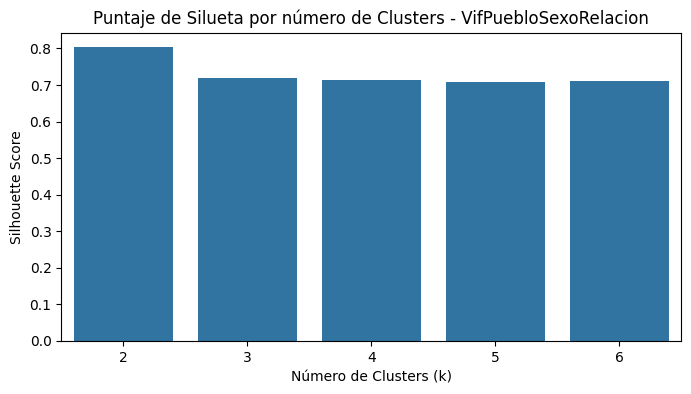

In [12]:
variables_pueblo = [
    "Total", "Ladinos(as)", "Mayas", "Garífunas", "Xinkas",
    "Otro", "No indica", "Ignorado"
]
df_resultado_pueblo, stats_pueblo = hacer_clustering(
    dfs["VifPuebloSexoRelacion"],
    "VifPuebloSexoRelacion",
    variables_pueblo
)
